In [12]:
import matplotlib as mpl
import torch
import warnings
import matplotlib
from sys import platform
from display_results_helper import *
from hyperparameters import Hyperparameters
warnings.filterwarnings("ignore")
import pickle
import json
from utils.DepthModel.Leres.data.multi_dataset import MultiDataset
import helper
import cv2
mpl.rcParams["legend.framealpha"] = 1
matplotlib.rc('font', **{'size': 15})

%load_ext autoreload
%autoreload 2

device_name = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# To obtain all results, run reproducible_experiments/run_all_depth_experiments.py

# Single risk depth experiment visualization

In [13]:
meters_factor = 1 / 256
starting_test_time = 8000

base_hyperparameters = Hyperparameters(method_type='i2i', backbone='res101')

annotations_path = "RCOL_datasets/real_data/depths/KITTI/annotations/train_annotations_onlyvideos.json"
with open(annotations_path, 'r') as load_f:
    annotations = json.load(load_f)
base_data_path = "RCOL_datasets/real_data/depths"

base_path = 'results/test/figures/real/KITTI'

def plot_by_time(time, calibration_method, uq_method, gamma=0.2):
    idx = time - starting_test_time
    hyperparameters = copy.deepcopy(base_hyperparameters)
    hyperparameters.calibration_method = calibration_method
    if calibration_method == 'not calibrated':
        hyperparameters.is_calibrated = False
    else:
        hyperparameters.is_calibrated = True

    hyperparameters.uq_method = uq_method
    hyperparameters.gamma = gamma
    rgb_im = cv2.imread(f'{base_data_path}/{annotations[time]["rgb_path"]}', -1)
    depth_im = cv2.imread(f'{base_data_path}/{annotations[time]["depth_path"]}', -1) * meters_factor
    tmp_hyperparameters = copy.deepcopy(hyperparameters)
    tmp_hyperparameters.uq_method = 'baseline'
    tmp_hyperparameters.is_calibrated = False
    estimated_depth_im = cv2.imread(f"{base_path}/{tmp_hyperparameters.to_folder_name()}/estimated_depth/estimated_depth_time={time}.png", -1)* meters_factor
    intervals_im = cv2.imread(f"{base_path}/{hyperparameters.to_folder_name()}/uq/intervals_lengths_time={time}.png", -1)* meters_factor

    with open(f"{base_path}/{hyperparameters.to_folder_name()}/test_augmentation_info.pkl", "rb") as input_file:
        augmentation_info = pickle.load(input_file)

    info = augmentation_info[idx]
    def display_heatmap(image, title,save_dir=None, **kwargs):
        f, ax = plt.subplots(figsize=(12, 4))
        ax = sns.heatmap(image, ax=ax, **kwargs)
        ax.set_aspect("equal")
        ax.set(xticklabels=[])
        ax.set(yticklabels=[])
        ax.tick_params(bottom=False)
        ax.tick_params(left=False)
        if save_dir is not None:
            helper.create_folder_if_it_doesnt_exist('depth_experiment_figures')
            plt.savefig(f"depth_experiment_figures/{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
        plt.show()

    flip_flg, resize_size, crop_size, pad = info['flip_flg'], info['resize_size'], info['crop_size'], info['pad']
    resized_depth_im = MultiDataset.flip_reshape_crop_pad(depth_im, flip_flg, resize_size, crop_size, pad, 0)
    resized_rgb_im = MultiDataset.flip_reshape_crop_pad(rgb_im, flip_flg, resize_size, crop_size, pad, 0)

    resized_depth_im = resized_depth_im[pad[0]: -1-pad[1], pad[2]: -1-pad[3]]
    estimated_depth_im = estimated_depth_im[pad[0]: -1-pad[1], pad[2]: -1-pad[3]]
    intervals_im = intervals_im[pad[0]: -1-pad[1], pad[2]: -1-pad[3]]
    resized_rgb_im = resized_rgb_im[pad[0]: -1-pad[1], pad[2]: -1-pad[3]]
    
    f, ax = plt.subplots(figsize=(9.5, 8))
    ax.imshow(resized_rgb_im)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)
    helper.create_folder_if_it_doesnt_exist('depth_experiment_figures')
    plt.savefig("depth_experiment_figures/Input_Frame.png", dpi=300, bbox_inches='tight')
    plt.show()

    display_heatmap(resized_depth_im, "Ground Truth Depth",cmap="rocket_r", save_dir='depth_experiment_figures')
    display_heatmap(estimated_depth_im, "Estimated Depth",cmap="rocket_r", save_dir='depth_experiment_figures')
    display_heatmap(intervals_im, "Uncertainty Size", cmap="mako_r", save_dir='depth_experiment_figures')

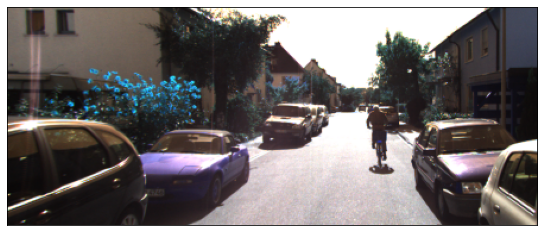

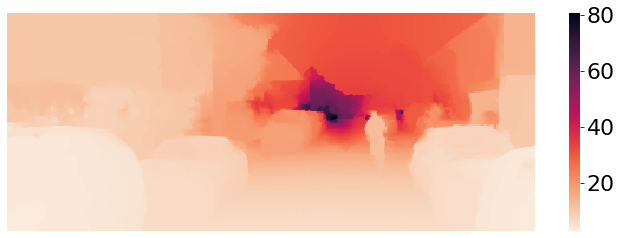

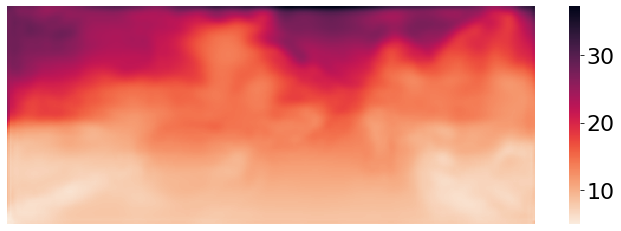

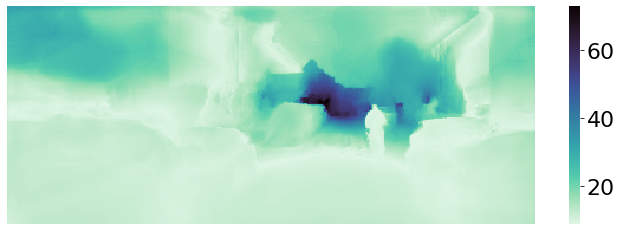

In [15]:
matplotlib.rc('font', **{'size': 22})
plot_by_time(8020, calibration_method='single_theta_exp_e_stretching', uq_method='previous_residual_with_flow', gamma=0.2)


# Uncertainty quantification for depth prediction

metric:  Image Coverage
uq_method=baseline cal=single_theta_exp_e_stretching γ=0.5: 80.002
uq_method=residual_magnitude cal=single_theta_exp_e_stretching γ=0.05: 79.993
uq_method=previous_residual cal=single_theta_exp_e_stretching γ=0.1: 79.996
uq_method=previous_residual_with_flow_1 cal=single_theta_exp_e_stretching γ=0.2: 80.001


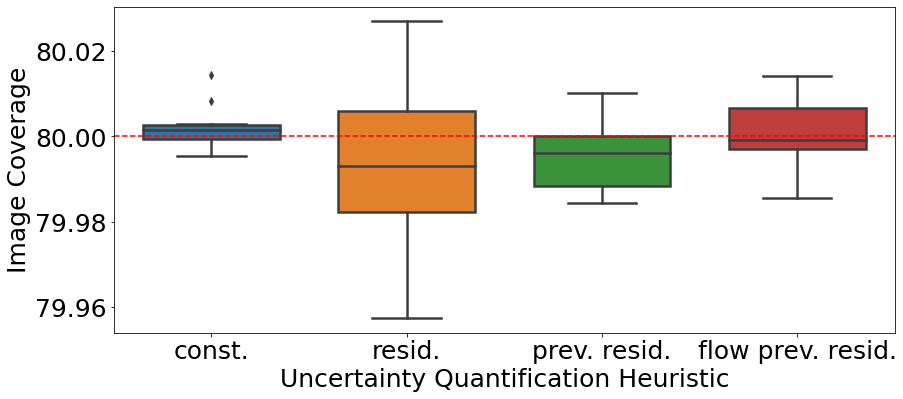

metric:  Average Length
uq_method=baseline cal=single_theta_exp_e_stretching γ=0.5: 24.101
uq_method=residual_magnitude cal=single_theta_exp_e_stretching γ=0.05: 39.06
uq_method=previous_residual cal=single_theta_exp_e_stretching γ=0.1: 21.924
uq_method=previous_residual_with_flow_1 cal=single_theta_exp_e_stretching γ=0.2: 18.042


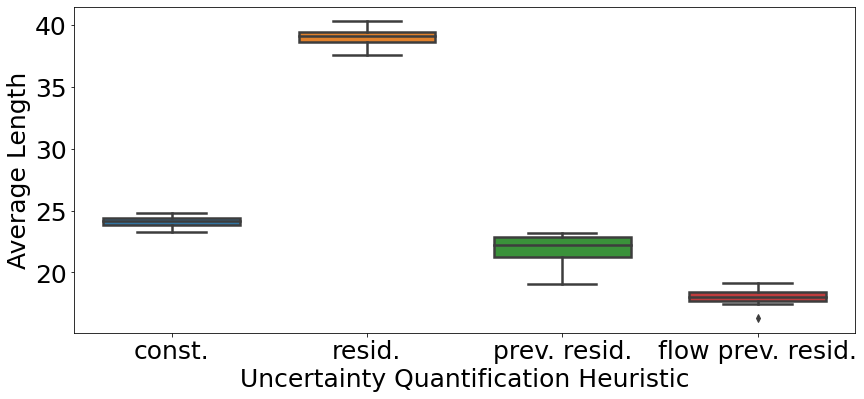

metric:  Center Coverage
uq_method=baseline cal=single_theta_exp_e_stretching γ=0.5: 72.022
uq_method=residual_magnitude cal=single_theta_exp_e_stretching γ=0.05: 66.681
uq_method=previous_residual cal=single_theta_exp_e_stretching γ=0.1: 73.966
uq_method=previous_residual_with_flow_1 cal=single_theta_exp_e_stretching γ=0.2: 78.01


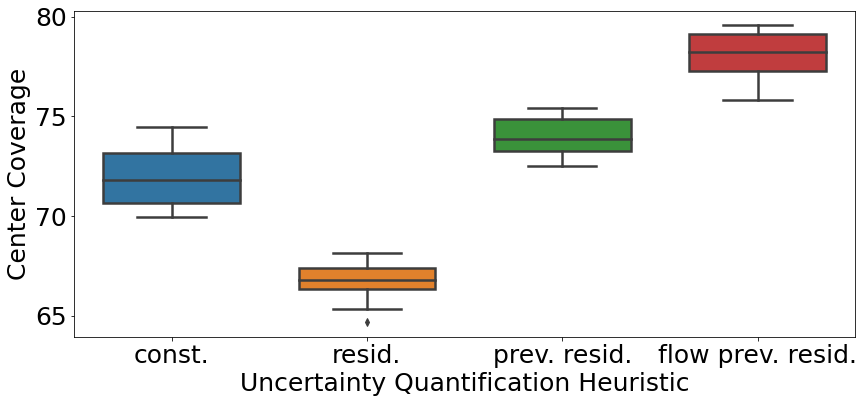

metric:  Center Average Length
uq_method=baseline cal=single_theta_exp_e_stretching γ=0.5: 24.101
uq_method=residual_magnitude cal=single_theta_exp_e_stretching γ=0.05: 20.798
uq_method=previous_residual cal=single_theta_exp_e_stretching γ=0.1: 18.615
uq_method=previous_residual_with_flow_1 cal=single_theta_exp_e_stretching γ=0.2: 17.086


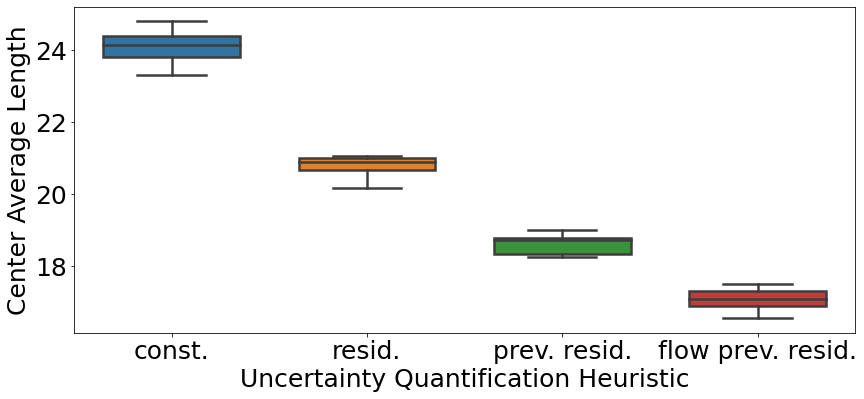

metric:  Center Failure Rate
uq_method=baseline cal=single_theta_exp_e_stretching γ=0.5: 30.505
uq_method=residual_magnitude cal=single_theta_exp_e_stretching γ=0.05: 38.265
uq_method=previous_residual cal=single_theta_exp_e_stretching γ=0.1: 23.92
uq_method=previous_residual_with_flow_1 cal=single_theta_exp_e_stretching γ=0.2: 16.8


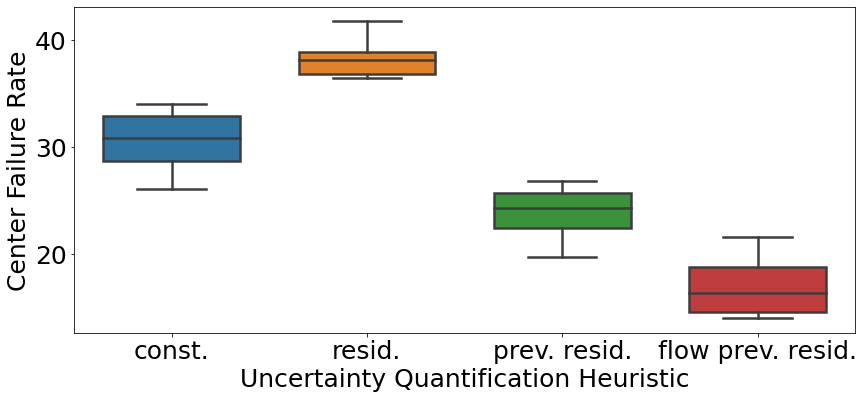

In [26]:
matplotlib.rc('font', **{'size': 25})
        
depth_data_plot(seeds=10, desired_coverage_level=80,
                    full_dataset_name='KITTI',
                    path='depth_data_plots',
                    calibration_methods=[

                        'single_theta_exp_e_stretching',                        
                                        ],
                    uq_methods=['baseline','residual_magnitude', 'previous_residual', 'previous_residual_with_flow',],
                display_errors=False,
                   backbone='res101')

# Multiple risks: controlling both center failure rate and image coverage

metric:  Image Coverage
exp. stretching γ=0.5: 79.997
max aggregation γ=[0.01, 0.01]: 85.576
mean aggregation γ=[0.0001, 0.01]: 85.655


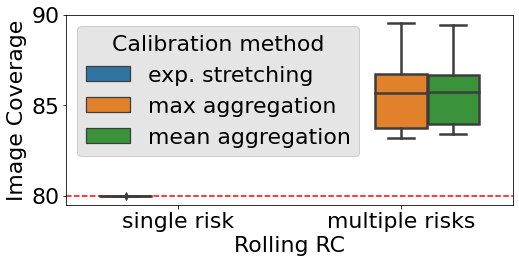

metric:  Center Failure Rate
exp. stretching γ=0.5: 17.035
max aggregation γ=[0.01, 0.01]: 9.985
mean aggregation γ=[0.0001, 0.01]: 9.97


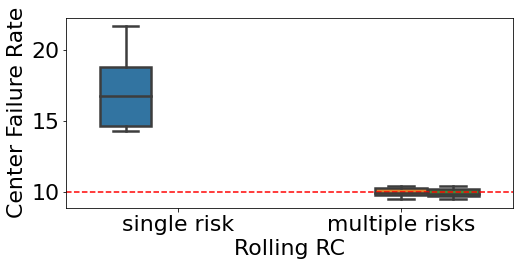

metric:  Average Length
exp. stretching γ=0.5: 18.189
max aggregation γ=[0.01, 0.01]: 22.886
mean aggregation γ=[0.0001, 0.01]: 22.562


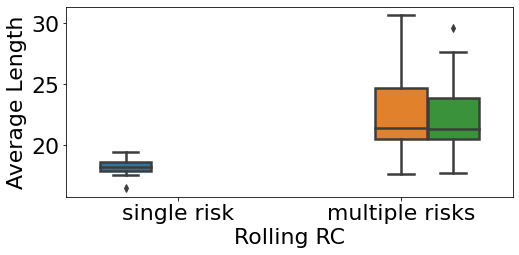

In [25]:
# calibration_methods=['single_theta', 'multi_theta', 'multi_combined_theta'],
# 
# uq_methods=['baseline', 'residual_magnitude', 'pixelwise_qr', 'residual_qr'],
matplotlib.rc('font', **{'size': 22})

depth_multi_risks_plot(seeds=10, desired_coverage_level=80,
                    full_dataset_name='KITTI',
                    path='multi_risk_depth_data_plots',
                       standard_calibration_methods=[
#                        'single_theta_identity_stretching',
                           
                        'single_theta_exp_e_stretching',
                       ],
                    multi_risks_calibration_methods=[
                        
                        'multi_risk_agg=max_exp_e_stretching',  
                        'multi_risk_agg=mean_exp_e_stretching', 
                                        ],
                    uq_method='previous_residual_with_flow',
                    display_errors=False,
                   backbone='res101')

# Plot coverage and length during the test process

coverages mean: 79.99487266466022


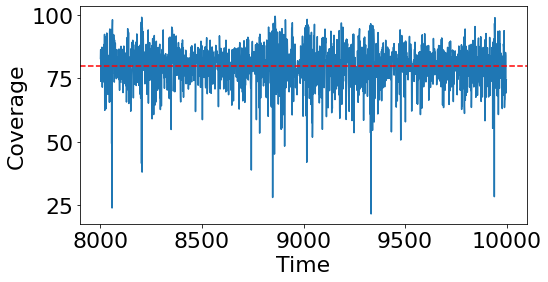

lengths mean: 19.110898971557617


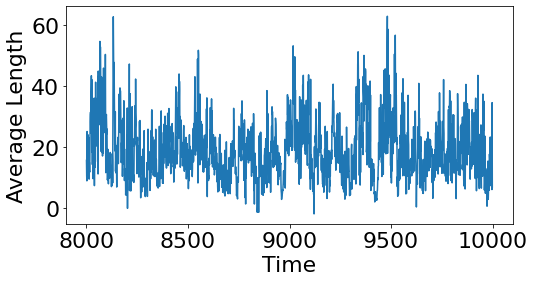

In [16]:
import helper
matplotlib.rc('font', **{'size': 22})

base_hyperparameters = Hyperparameters(method_type='i2i', backbone='res101')
base_path = 'results/test/figures/real/KITTI'

def plot_cov_len(calibration_method, uq_method, gamma=0.2):
    hyperparameters = copy.deepcopy(base_hyperparameters)
    hyperparameters.calibration_method = calibration_method
    if calibration_method == 'not calibrated':
        hyperparameters.is_calibrated = False
    else:
        hyperparameters.is_calibrated = True

    hyperparameters.uq_method = uq_method
    hyperparameters.gamma = gamma
    for im_name in ['coverages', 'lengths']:
        title = im_name.replace("coverages", "Coverage") \
        .replace("lengths", "Average Length")
        f, ax = plt.subplots(figsize=(8, 4))
        path = f"{base_path}/{hyperparameters.to_folder_name()}/{im_name}.pkl"
        with open(path, "rb") as input_file:
            arr = pickle.load(input_file)
        print(f"{im_name} mean: {np.mean(arr)}")
        plt.plot(list(range(8000, 10000)), arr)
        if 'coverage' in im_name:
            plt.axhline(80, color='r', ls='--')
        helper.create_folder_if_it_doesnt_exist(f"depth_experiment_figures/{uq_method}")
        plt.xlabel("Time")
        plt.ylabel(title)
        plt.savefig(f"depth_experiment_figures/{uq_method}/{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
        plt.show()
            
plot_cov_len(calibration_method='single_theta_exp_e_stretching', uq_method='previous_residual_with_flow', gamma=0.2)
# plot_cov_len(calibration_method='single_theta_exp_e_stretching', uq_method='baseline', gamma=0.5)